# Predicción de Precios de Viviendas en California

**Objetivo**  
En esta actividad, analizaremos datos de un censo del estado de California para construir un modelo de aprendizaje automático que prediga el precio medio de las viviendas en diferentes distritos.  

**Descripción del Conjunto de Datos**  
El conjunto de datos incluye información sobre diversos factores que pueden influir en el precio de las viviendas, como:  
- **Población:** Número de habitantes en cada área.  
- **Ingreso medio:** Promedio de ingresos de los residentes en cada distrito.  
- **Precio medio de las viviendas:** Valor promedio de las propiedades en cada zona.  

Los datos están organizados por **grupos de bloques**, que constituyen la unidad geográfica más pequeña utilizada por la Oficina del Censo de los Estados Unidos para la publicación de información estadística. Cada grupo de bloques generalmente tiene una población de entre **600 y 3,000 personas**, nos referiremos a estos grupos como **"distritos"**.  

### **Data pipeline o flujo de datos**

Una secuencia de componentes de procesamiento de datos se llama flujo de datos, _data pipeline_ o simplemente _pipeline_.

Vamos a utilizar este concepto de _pipeline_ para transformar los datos, aplicar algún algoritmo de aprendizaje automático (modelo) y evaluar posteriormente dicho algoritmo. Particularmente utilizaremos herramientas de la biblioteca de scikit-learn junto con pandas.

**¿Qué es un ML Pipeline?**  

Un **pipeline de aprendizaje automático (ML Pipeline o Pipeline)** es una secuencia estructurada de pasos que se utilizan para preparar los datos, entrenar modelos y evaluar su desempeño de manera eficiente y **reproducible**. Su objetivo es automatizar el flujo de trabajo del aprendizaje automático, asegurando que cada fase del proceso se realice de manera consistente y sin errores manuales. Los _pipelines_ son muy comunes en sistemas de aprendizaje automático, ya que hay muchos datos para manipular y muchas transformaciones de datos que aplicar.  


**Etapas de un Pipeline**  

1. **Adquisición y Generación de Datos**  
   - Obtener datos de distintas fuentes (archivos, bases de datos, APIs, sensores, etc.).  

2. **Construcción del Dataset**  
   - Seleccionar las variables relevantes.  
   - Integrar diferentes fuentes de datos.  

3. **Análisis Exploratorio inicial de Datos**  
   - Detectar número de instancias
   - Examinar los tipos de datos presentes
   - Detectar datos faltantes
   - Examinar distribuciones y rangos de las características. 

4. **División del Conjunto de Datos**  
   - Separar los datos en conjunto de entrenamiento, validación y prueba.  
   - Asegurar una distribución adecuada de las clases en cada conjunto.  

5. **Preprocesamiento de Datos**  
   - Manejo de datos faltantes.  
   - Normalización, estandarización de variables.  
   - Codificación de variables categóricas.  
   - Balance de clases.

6. **Selección y Entrenamiento del Modelo**  
   - Elegir el modelo adecuado según la tarea (regresión, clasificación, clustering, etc.).  
   - Ajustar los hiperparámetros para optimizar el rendimiento del modelo.  
   - Entrenar el modelo con los datos procesados.  

7. **Evaluación del Modelo**  
   - Medir el desempeño con métricas como MSE (Error Cuadrático Medio) para regresión o Precisión, Recall y F1-score para clasificación.  
   - Comparar diferentes modelos y configuraciones.  

8. **Despliegue del Modelo**  
   - Integrar el modelo en una aplicación o servicio en producción.  
   - Monitorizar su rendimiento en tiempo real y actualizarlo según sea necesario.  


**¿Por qué usar un Pipeline?**  

**Automatización:** Reduce la intervención manual en cada paso del proceso.  
**Reproducibilidad:** Permite replicar el flujo de trabajo con facilidad.  
**Escalabilidad:** Puede adaptarse a grandes volúmenes de datos sin modificar la estructura.  
**Modularidad:** Facilita la experimentación y prueba de diferentes enfoques sin afectar todo el sistema.  

# Análisis Exploratorio inicial de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargamos los datos

In [2]:
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'
    print('google.colab')

In [3]:
df_housing = pd.read_csv("./1_datos/housing.csv")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Cada fila representa un distrito. La tabla tiene 10 atributos: longitud, latitud, mediana de la edad de viviendas, total de habitaciones, total de dormitorios, población, hogares, mediana del ingreso, mediana del valor de la vivienda y proximidad al océano.

**Para conocer los atributos existentes y el número de instancias**

In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


El conjunto de datos contiene **20,640 instancias**, pero el atributo `total_bedrooms` solo tiene **20,433** valores no nulos, lo que indica que hay 207 valores faltantes en esta columna. Podemos observar también información sobre los **tipos de datos**

**Para conocer las categorias existentes (en una variable categórica) y el número de instancias en cada categoría**

In [5]:
df_housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

**describe() muestra un resumen de los atributos numéricos**

In [6]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


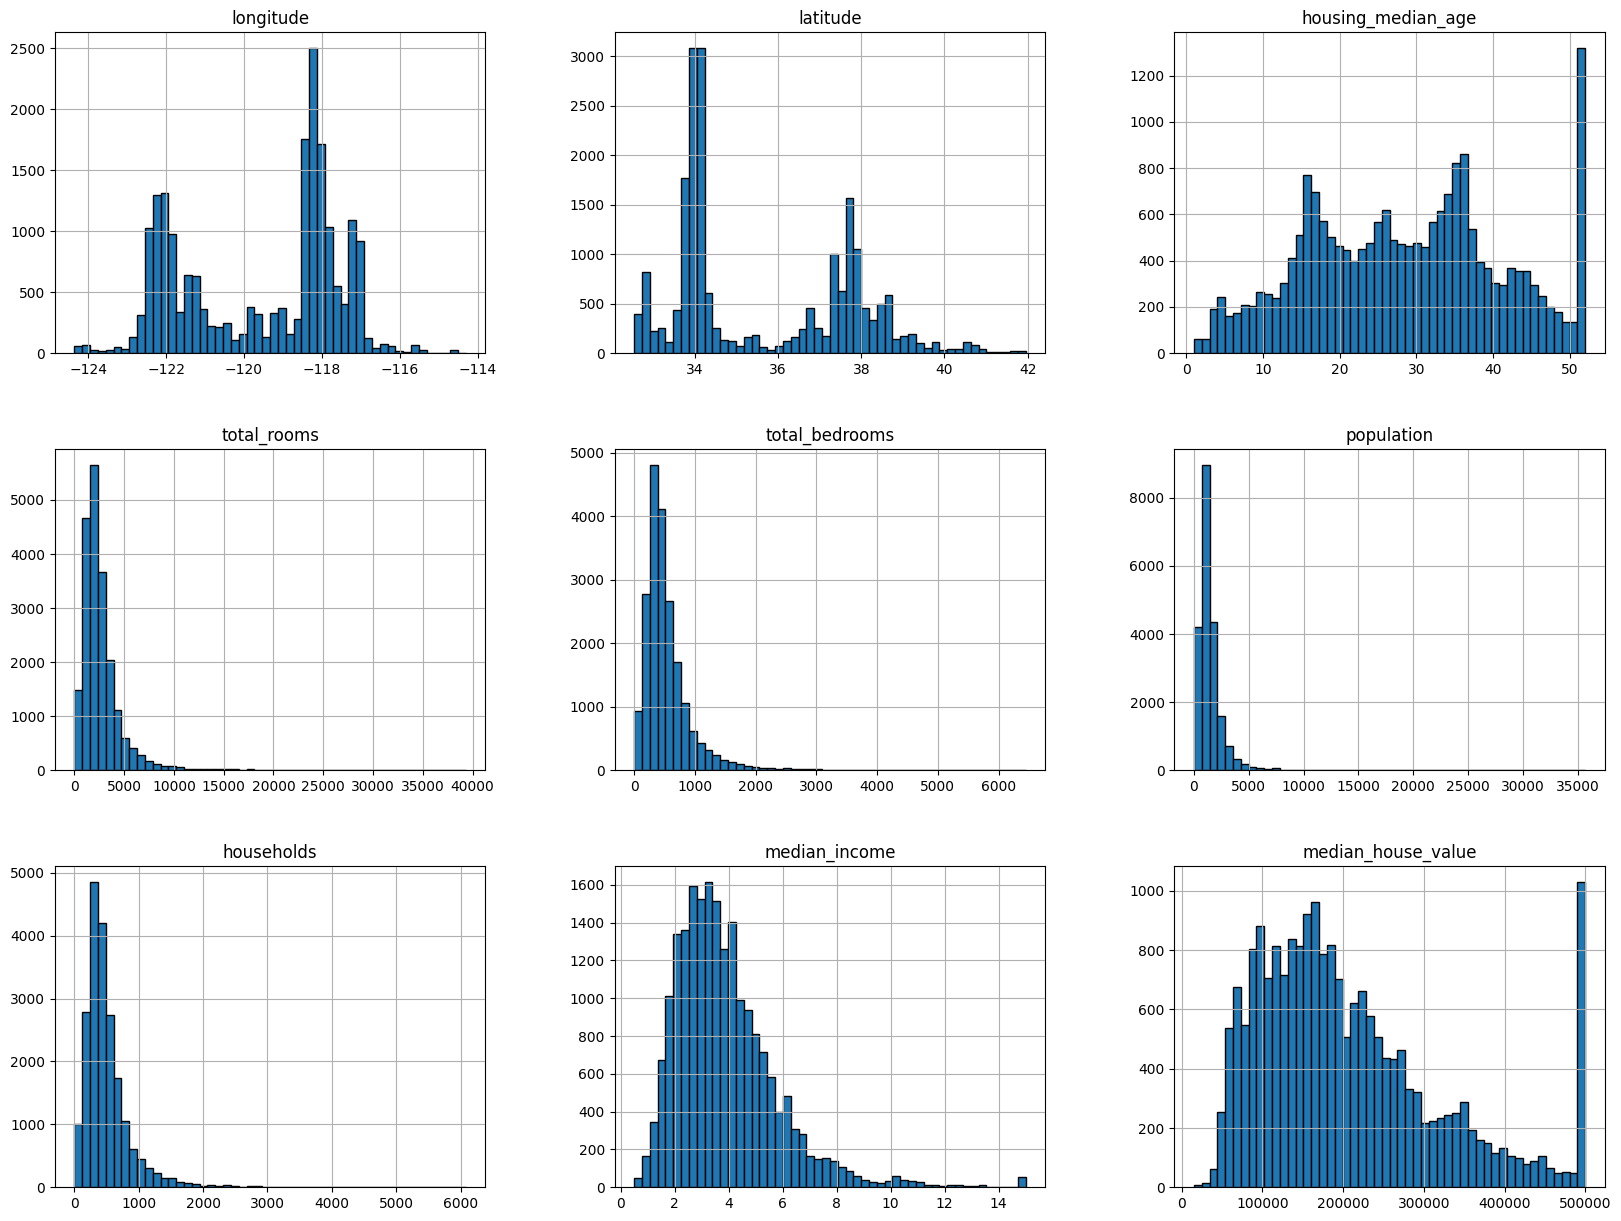

In [7]:
df_housing.hist(bins=50, edgecolor='k', figsize=(20,15))
plt.show()

- El atributo **`median_income`** no está expresado en dólares estadounidenses (USD). Tras verificarlo, se ha confirmado que los valores han sido **escalados y limitados**, con un mínimo de **0.5** y un máximo de **15**. Estos números representan aproximadamente **decenas de miles de dólares** (por ejemplo, un valor de `3` equivale a un ingreso de aproximadamente **$30,000**). Es común trabajar con atributos preprocesados en aprendizaje automático, lo que no necesariamente representa un problema, pero es fundamental comprender cómo se calcularon los datos para interpretarlos correctamente.  

- Los atributos **`housing_median_age`** y **`median_house_value`** también han sido **limitados**. En particular, **`median_house_value`** es el atributo objetivo (_target_), lo que podría generar un problema significativo: el modelo podría aprender que los precios nunca superan dicho límite. Si nuestro cliente necesita predicciones precisas incluso **más allá de $500,000**, existen dos opciones:  
  1. **Recopilar etiquetas adecuadas** para los distritos cuyos valores han sido limitados.  
  2. **Eliminar esos distritos del conjunto de datos**, evitando así sesgos en el modelo.  

- Algunos **histogramas presentan una distribución sesgada hacia la derecha**, es decir, se extienden mucho más hacia la derecha de la mediana que hacia la izquierda. Esta asimetría puede dificultar la detección de patrones para ciertos algoritmos de aprendizaje automático, lo que podría requerir transformaciones en los datos, como el uso de una escala logarítmica o normalización, para mejorar el rendimiento del modelo.

## Advertencia ⚠️

**Antes de continuar observando los datos, vamos a separar un conjunto de prueba y no lo miramos más!!!**

# División del Conjunto de Datos

**¿Qué es un muestreo estratificado?**

En muchos problemas de aprendizaje automático, es crucial que los conjuntos de entrenamiento y de prueba sean representativos de la distribución de los datos originales. Si esto no es así, las evaluaciones del modelo pueden ser engañosas.

Por ejemplo, si consultamos a expertos, podríamos descubrir que **median_income** es un atributo clave para predecir el precio medio de las viviendas. En este caso, debemos asegurarnos de que la distribución de ingresos de los conjuntos sean similares a la del conjunto de datos original. Para lograrlo, utilizamos una técnica llamada **muestreo estratificado**.

El muestreo aleatorio simple no siempre garantiza que todas las categorías importantes de una variable estén bien representadas en los conjuntos de entrenamiento y prueba. Para solucionar esto, el muestreo estratificado divide los datos en estratos basados en un atributo relevante y luego selecciona muestras proporcionales de cada estrato.

En este caso, median_income es un atributo numérico continuo, por lo que primero necesitamos convertirlo en un atributo categórico. Para ello, creamos una nueva variable llamada `income_cat`, donde agruparemos los valores de median_income en categorías o estratos.

**Análisis del histograma de median_income**

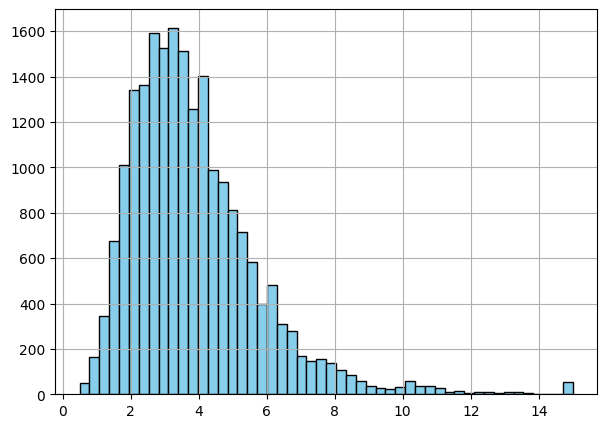

In [8]:
_ = df_housing["median_income"].hist(bins=50, color='skyblue', edgecolor='k', figsize=(7,5))

Al observar el histograma de `median_income`, notamos que:  
- La mayoría de los valores están **concentrados entre 1.5 y 6**, lo que equivale a ingresos aproximados de **$15,000 a $60,000**.  
- Algunos valores superan **6**, lo que representa ingresos más altos y menos frecuentes.  
- Para que la muestra sea representativa, es importante que cada estrato tenga **suficientes instancias**.  
- **No conviene definir demasiados estratos**, ya que algunos podrían contener muy pocos datos y no aportarían información útil.  


### **Creación de los estratos con `pd.cut()`**  
Para segmentar los ingresos en **cinco categorías**, utilizamos la función `pd.cut()`, que divide el rango de valores en intervalos definidos:  

- **Categoría 1:** `income_cat = 1` → ingresos entre **0 y 1.5** (menos de **$15,000**).  
- **Categoría 2:** `income_cat = 2` → ingresos entre **1.5 y 3**.  
- **Categoría 3:** `income_cat = 3` → ingresos entre **3 y 4.5**.  
- **Categoría 4:** `income_cat = 4` → ingresos entre **4.5 y 6**.  
- **Categoría 5:** `income_cat = 5` → ingresos **mayores a 6**.  

Este enfoque nos permite aplicar **muestreo estratificado** asegurando que la distribución de ingresos en el conjunto de prueba sea representativa de la población total, lo que mejora la capacidad del modelo para generalizar sus predicciones.

In [9]:
df_housing["income_cat"] = pd.cut(df_housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


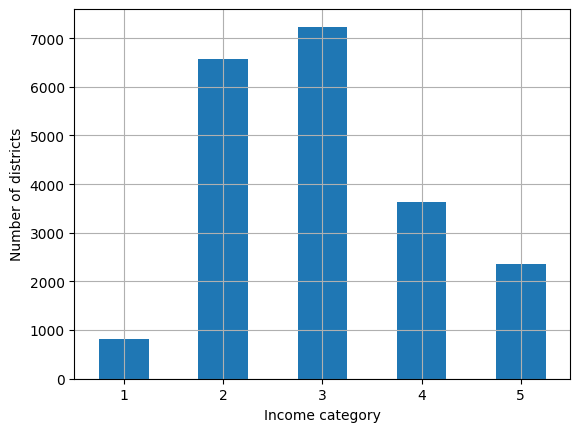

In [10]:
df_housing["income_cat"].value_counts().sort_index().plot.bar(rot=0)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
_ = plt.grid()

Ahora podemos hacer un muestreo estratificado usando la categoría `income_cat`

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing, test_size=0.2, stratify=df_housing["income_cat"], random_state=42)

In [12]:
# Eliminamos la categoria income_cat de ambos conjuntos porque no la usamos más
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Visualización del conjunto de entrenamiento

In [13]:
# Antes de continuar hacemos una copia del conjunto de entrenamiento
housing = train_set.copy()

### Visualización geográfica

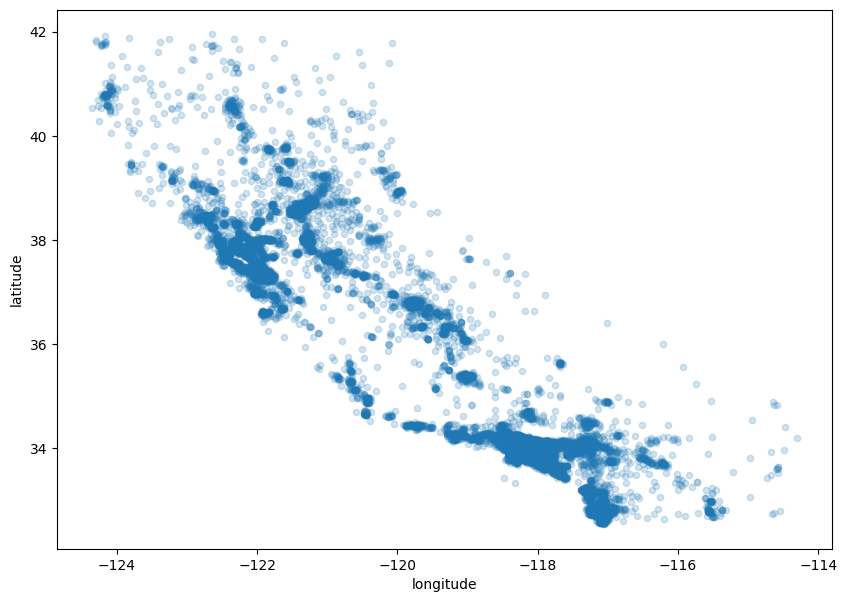

In [14]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha=0.2, figsize=(10,7))
plt.show()

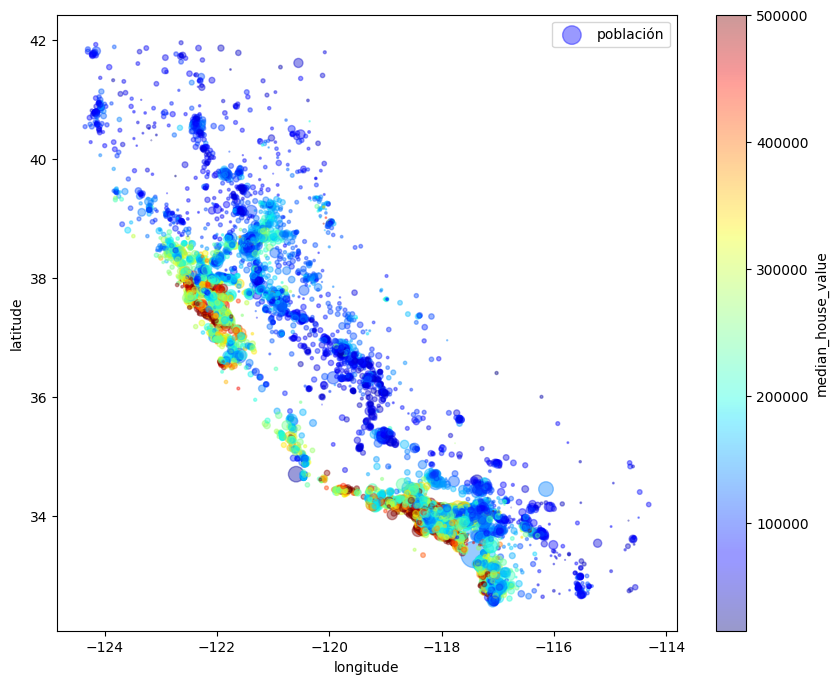

In [15]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha=0.4,
              s = housing["population"]/100 , label="población", c="median_house_value",
              cmap="jet", colorbar = True, legend = True, figsize=(10,8))
plt.show()

Esta imagen indica que los precios de las viviendas están muy relacionados con la ubicación (por ejemplo, cerca del océano) y con la densidad de población.

## Correlaciones en el conjunto de Datos

Para analizar las relaciones entre los atributos del conjunto de datos, podemos calcular fácilmente el **coeficiente de correlación de Pearson** entre cada par de variables. En particular, nos interesa conocer la correlación de cada atributo con la variable objetivo, `median_house_value`, ya que esto nos ayudará a identificar qué características tienen mayor impacto en el precio de las viviendas.

In [16]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


### **¿Qué es el coeficiente de correlación de Pearson?**  

El **coeficiente de correlación de Pearson (r)** mide la fuerza y dirección de la relación **lineal** entre dos variables numéricas. Su valor oscila entre **-1 y 1**:  

- **r ≈ 1** → **Correlación positiva fuerte**: cuando una variable aumenta, la otra también tiende a aumentar.  
  - Ejemplo: Se observa una fuerte correlación positiva entre **`median_income`** y **`median_house_value`**, lo que indica que los ingresos medianos tienen un impacto significativo en el valor de las viviendas.  

- **r ≈ -1** → **Correlación negativa fuerte**: cuando una variable aumenta, la otra tiende a disminuir.  
  - Ejemplo: Existe una ligera correlación negativa entre **`latitud`** y **`median_house_value`**, lo que sugiere que las viviendas tienden a ser más económicas a medida que nos desplazamos hacia el norte.  

- **r ≈ 0** → **Sin correlación lineal**: las variables no tienen una relación lineal evidente. Sin embargo, esto no implica que no haya relación alguna, solo que no es lineal. 

**Correlación de cada atributo con `median_house_value`**

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


Al calcular las correlaciones con la variable objetivo, podemos obtener información valiosa sobre los factores que más influyen en los precios de las viviendas. En general, en este conjunto de datos:  

- **`median_income`** muestra la correlación más fuerte con **`median_house_value`** (cercana a **0.7** o más). Esto confirma que el nivel de ingresos en un distrito es un **indicador clave** para predecir el precio de las viviendas.  
- **`total_rooms` y `housing_median_age`** tienen correlaciones moderadas con el valor de las viviendas, lo que indica que pueden ser útiles, pero no son los principales factores determinantes.  
- **`latitude`** y **`longitude`** presentan correlaciones débiles, lo que sugiere que la ubicación geográfica tiene cierto impacto en los precios, pero de manera menos pronunciada en comparación con el ingreso medio.  

### **Limitaciones de la Correlación**  

Aunque la correlación de Pearson es una herramienta útil, **solo mide relaciones lineales**. Es posible que existan patrones no lineales entre los atributos que esta medida no detecte. Por ejemplo:  
- Una variable podría tener un **impacto significativo en los precios**, pero de forma no lineal (por ejemplo, los precios podrían aumentar hasta cierto punto y luego estabilizarse o disminuir).  
- La correlación no captura **efectos combinados** de múltiples atributos. Puede haber interacciones entre variables que afecten los precios de manera conjunta. 

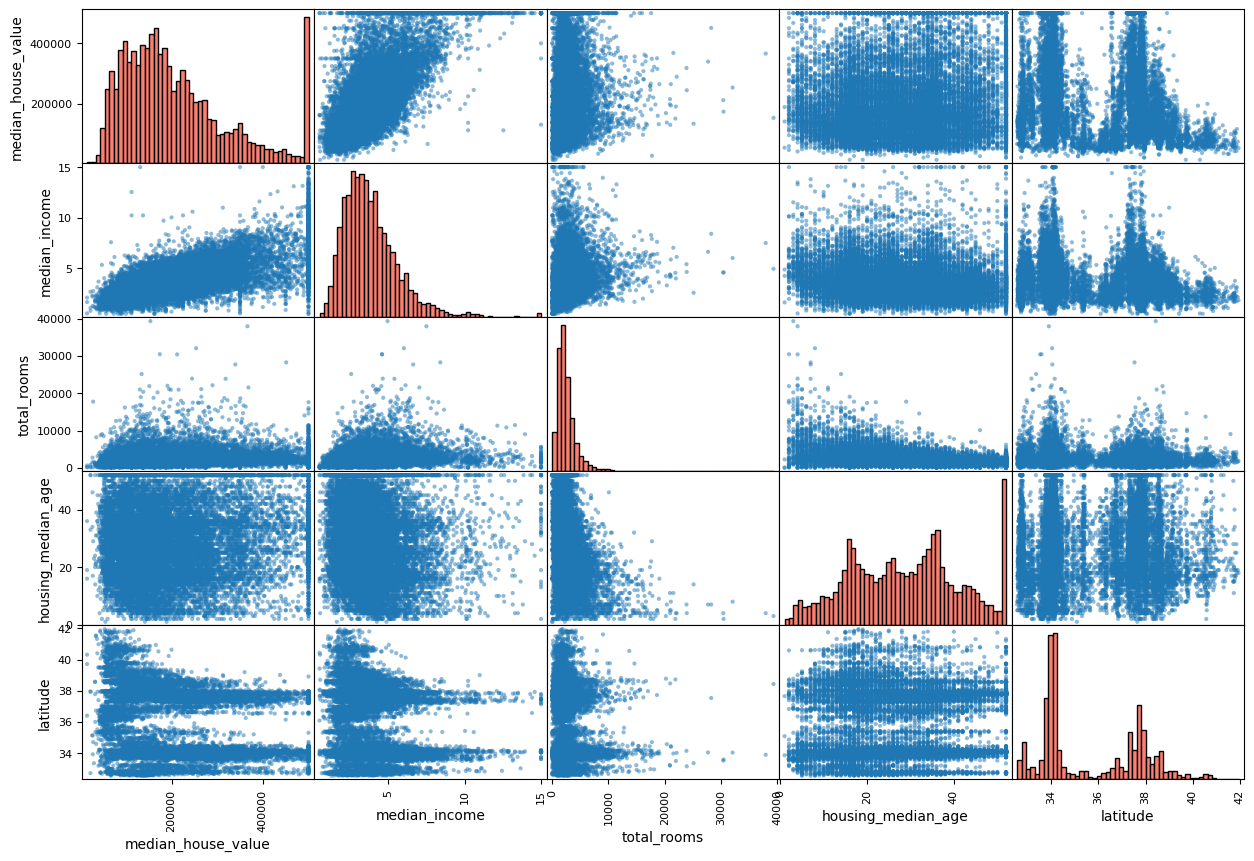

In [18]:
from pandas.plotting import scatter_matrix

atributos = ["median_house_value", "median_income", "total_rooms", "housing_median_age", 'latitude']
scatter_matrix(housing[atributos], figsize=(15,10), hist_kwds={'bins':50, 'color':'salmon', 'edgecolor':'k'})
plt.show()

## Resumen de la primera parte:

En esta primera parte:
- Obtuvimos los datos
- Hicimos una exploración inicial para determinar:
    - número de instancias
    - número de atributos
    - tipos de datos de los atributos
    - si hay datos faltantes
- Dividimos los datos en conjuntos de entrenamiento y prueba. La división se hizo de forma estratificada en función de un atributo definido por expertos.
- Exploramos más en profundidad el conjunto de entrenamiento mediante visualizaciones, búsqueda de atributos correlacionados.


# Preprocesamiento de los Datos

In [19]:
# Cargamos los datos
df_housing = pd.read_csv("./1_datos/housing.csv")

# Creamos nuestro atributo categórico para los ingresos
df_housing["income_cat"] = pd.cut(df_housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

# Dividimos los datos en conjunto de entrenamiento y prueba
train_set, test_set = train_test_split(df_housing, test_size=0.2, stratify=df_housing["income_cat"], random_state=42)

# Eliminamos la categoria income_cat de ambos conjuntos porque no la usamos
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Separamos los predictores de las etiquetas

In [20]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

## Limpieza de Datos

La mayoría de los algoritmos de aprendizaje automático no pueden trabajar con características faltantes, por lo que debemos ocuparnos de esto. Por ejemplo, vimos que el atributo `total_bedrooms` tiene algunos valores faltantes. Existen tres opciones para solucionar esto:

1. Eliminar los distritos correspondientes.
2. Eliminar el atributo.
3. Reemplazar los valores faltantes con algún valor (cero, la media, la mediana, etc.). A esto se llama _imputación_.

In [21]:
# índices de las filas con datos faltantes
null_rows_idx = housing.isnull().any(axis=1) #recorre las columnas a lo largo de las filas
# housing.loc[null_rows_idx].head()
null_rows_idx

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Length: 16512, dtype: bool

In [22]:
housing.loc[null_rows_idx].info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 1606 to 13336
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           158 non-null    float64
 1   latitude            158 non-null    float64
 2   housing_median_age  158 non-null    float64
 3   total_rooms         158 non-null    float64
 4   total_bedrooms      0 non-null      float64
 5   population          158 non-null    float64
 6   households          158 non-null    float64
 7   median_income       158 non-null    float64
 8   ocean_proximity     158 non-null    object 
dtypes: float64(8), object(1)
memory usage: 12.3+ KB


In [23]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # opción 1: elimino los distritos con datos faltantes

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [24]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # opción 2: elimino la columna

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [25]:
housing_option3 = housing.copy()

median = housing_option3["total_bedrooms"].median()
housing_option3["total_bedrooms"] = housing_option3["total_bedrooms"].fillna(median)  # opción 3: reemplazo los valores faltantes con la mediana

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


vamos a optar por la opción 3 ya que es la menos destructiva, pero en lugar del código anterior, usaremos una clase de Scikit-Learn:   `SimpleImputer`.

La ventaja que esto posee es que almacenará el valor de la mediana de cada característica. Esto permitirá imputar valores faltantes no solo en el conjunto de entrenamiento, sino también en el conjunto de pruebas y cualquier dato nuevo que ingrese al modelo.

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

La mediana solo puede calcularse en atributos numéricos, creamos una copia de los datos solo con atributos numéricos (excluyendo `ocean_proximity`)

In [27]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [28]:
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])


Ahora se puede usar este imputador "entrenado" para transformar el conjunto de entrenamiento reemplazando los valores faltantes con las medianas calculadas:

In [29]:
X = imputer.transform(housing_num) # me devuelve un numpy array
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]], shape=(16512, 8))

Los valores faltantes también pueden reemplazarse con el valor medio `(strategy="mean")`, o con el valor más frecuente `(strategy="most_frequent")`, o con un valor constante `(strategy="constant", fill_value=...)`. Las dos últimas estrategias admiten datos no numéricos.

In [30]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [31]:
housing_train = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


## Manejo de atributos categóricos

Nuestro conjunto de datos tiene el atributo `ocean_proximity` que es de tipo categórico. La mayoría de algoritmos de aprendizaje automático no trabajan con atributos categóricos. Es necesario transformarlos en un formato que los algoritmos de aprendizaje automático puedan interpretar. Sin embargo, la forma en que se codifican estas variables puede afectar significativamente el rendimiento del modelo.

In [32]:
housing_cat = housing.loc[:,["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN


### Codificación de Variables Categóricas: Ordinal Encoder vs One-Hot Encoder

Primero probaremos la clase `OrdinalEncoder` de Scikit-Learn

In [33]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [34]:
housing_cat_encoded[:8]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Problema con la Codificación Ordinal**
Una forma sencilla de convertir valores categóricos en números es mediante codificación ordinal (`OrdinalEncoder` en scikit-learn). Este método asigna un número único a cada categoría.

| `ocean_proximity`  | Codificación ordinal |
|--------------------|---------------------|
| `<1H OCEAN`       | 0                   |
| `INLAND`          | 1                   |
| `ISLAND`          | 2                   |
| `NEAR BAY`        | 3                   |
| `NEAR OCEAN`      | 4                   |

El problema con esta representación es que los algoritmos de aprendizaje automático asumirán que los valores más cercanos son más similares que los más distantes. Es decir, el modelo podría interpretar erróneamente que INLAND (1) está más relacionado con <1H OCEAN (0) que con NEAR OCEAN (4), lo cual no es cierto, ya que estas categorías no tienen un orden natural.

`OrdinalEncoder` es útil cuando las categorías tienen un orden lógico, como en una escala de evaluación:

`"malo" → 0`, `"regular" → 1`, `"bueno" → 2`, `"excelente" → 3.`

**One-Hot Encoding**  

Para evitar este problema, una alternativa más efectiva es la codificación One-Hot (`OneHotEncoder` en scikit-learn). En este método, se crean variables binarias (0 o 1) para cada categoría, de manera que solo una de ellas estará activa.  

| `ocean_proximity`  | `<1H OCEAN` | `INLAND` | `ISLAND` | `NEAR BAY` | `NEAR OCEAN` |
|--------------------|-------------|----------|----------|------------|--------------|
| `<1H OCEAN`       | 1           | 0        | 0        | 0          | 0            |
| `INLAND`          | 0           | 1        | 0        | 0          | 0            |
| `ISLAND`          | 0           | 0        | 1        | 0          | 0            |
| `NEAR BAY`        | 0           | 0        | 0        | 1          | 0            |
| `NEAR OCEAN`      | 0           | 0        | 0        | 0          | 1            |

Clase `OneHotEncoder` de Scikit-Learn

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

Por defecto, la salida de un `OneHotEncoder` es una matriz rala (sparse matrix), en lugar de un arreglo NumPy. Una matriz rala es una representación muy eficiente para matrices que contienen principalmente ceros. Internamente, solo almacena los valores no nulos y sus posiciones. Cuando un atributo categórico tiene cientos o miles de categorías, codificarlo con one-hot resulta en una matriz muy grande llena de 0s excepto por un solo 1 por fila. Una matriz rala ahorra mucha memoria y acelerará los cálculos.

Se puede usar una matriz rala de manera similar a un arreglo 2D normal, pero se puede convertir a un arreglo NumPy (denso) con el método `toarray()`. También puede fijarse `sparse=False` al crear el `OneHotEncoder`, en cuyo caso el método `transform()` devolverá directamente un arreglo NumPy.

In [37]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

Cuando entrenamos cualquier estimador de Scikit-Learn utilizando un DataFrame, el estimador guarda los nombres de las columnas en el atributo `feature_names_in_`. Luego, Scikit-Learn asegura que cualquier DataFrame proporcionado a este estimador después de de ser entrenado (por ejemplo, a transform() o predict()) tenga los mismos nombres de columnas. También proporcionan un método `get_feature_names_out()` que se puede usar para construir un DataFrame:

In [38]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [39]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [40]:
df_housing_cat_1hot = pd.DataFrame(housing_cat_1hot.toarray(),
                         columns=cat_encoder.get_feature_names_out(),
                         index=housing_cat.index)

df_housing_cat_1hot

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


## Transformación y escalado de características

El escalado de características (feature scaling) es una de las transformaciones más importantes en el preprocesamiento de datos. Con pocas excepciones, los algoritmos de aprendizaje automático no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes.

En nuestro caso, los atributos presentan grandes diferencias en escala:

- `total_rooms` varía entre 6 y 39,320, lo que representa valores en un rango amplio.
- `median_income` varía entre 0 y 15, en un rango mucho más reducido.

Si no realizamos un escalado previo, atributos como `total_rooms` tendrán una influencia dominante en el modelo, lo que puede hacer que otras variables relevantes, como `median_income`, sean ignoradas.

Para abordar este problema, se pueden aplicar dos enfoques principales: escalado min-max (normalización) y estandarización.

### Escalado min-max

El **escalado min-max** (también llamado **normalización**) transforma los valores de un atributo para que se encuentren dentro de un rango específico, **por defecto entre 0 y 1**.  

Se calcula con la siguiente fórmula:  

$$
X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

donde:  
- $X$ es el valor original de la característica.  
- $X_{\min}$ es el valor mínimo en la columna.  
- $X_{\max}$ es el valor máximo en la columna.  
- $X'$ es el valor escalado.  

Scikit-Learn proporciona el transformer `MinMaxScaler`, que permite escalar los valores entre 0 y 1, o cualquier otro rango deseado mediante el hiperparámetro `feature_range`:

In [41]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [42]:
housing_num_min_max_scaled

array([[-0.42430279,  0.27098831,  0.09803922, ..., -0.87477228,
        -0.73711725, -0.76914801],
       [ 0.41832669, -0.88310308, -0.76470588, ..., -0.88721657,
        -0.71396565, -0.19485248],
       [ 0.05776892, -0.39851222,  0.68627451, ..., -0.96277923,
        -0.88872293, -0.67240452],
       ...,
       [-0.6752988 ,  0.25398512,  0.84313725, ..., -0.9744948 ,
        -0.93651979, -0.63037751],
       [-0.67131474,  0.22635494, -0.49019608, ..., -0.93245326,
        -0.81366692, -0.49014496],
       [-0.55976096,  0.57917109,  0.01960784, ..., -0.96513355,
        -0.92718447, -0.63697052]], shape=(16512, 8))

> Cuándo usarlo

- Recomendado para modelos basados en redes neuronales, ya que muchas arquitecturas funcionan mejor con valores en un rango pequeño (a menudo de -1 a 1).

- Útil cuando los datos tienen una distribución aproximadamente uniforme y no contienen valores atípicos extremos.

### Estandarización

La **estandarización** transforma los datos restando la media y dividiéndolos por la desviación estándar, de manera que la distribución resultante tenga **media 0** y **desviación estándar 1**.  

Se calcula con la siguiente fórmula:  

$$
X' = \frac{X - \mu}{\sigma}
$$

donde:  
- $X$ es el valor original.  
- $\mu$ es la media de la columna.  
- $\sigma$ es la desviación estándar de la columna.  
- $X'$ es el valor estandarizado.  

Scikit-Learn proporciona un _transformer_ llamado `StandardScaler`:

In [43]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [44]:
housing_num_std_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]], shape=(16512, 8))

> Cuando usarla

- Si los datos tienen valores atípicos que podrían afectar el escalado min-max.

- Si el modelo utilizado asume datos centrados en cero, como regresión logística y PCA.

> Si se quiere escalar una matriz rala sin convertirla en una matriz densa, se puede utilizar `StandardScaler` con el hiperparámetro `with_mean` igual a `False`. Esto solo dividirá los datos por el desvío estándar, sin restar la media (sino dejaría de ser rala):

### Transformación de características

Cuando la distribución de una característica es muy sesgada, tanto el escalado min-max como la estandarización pueden no ser suficientes para mejorar el desempeño del modelo. Esto se debe a que ambos métodos tratan todos los valores de la misma manera, sin considerar la asimetría de la distribución.

En estos casos, antes de escalar un atributo, se recomienda transformarlo para reducir el sesgo y, si es posible, hacer que su distribución sea aproximadamente simétrica (normal o gaussiana). Esto puede mejorar la capacidad del modelo para capturar patrones en los datos.

Para características positivas con sesgo hacia la derecha, se puede aplicar una transformación de raíz cuadrada o elevarla a una potencia menor que 1 para comprimir los valores altos y expandir los valores pequeños.

Si la característica tiene una cola muy larga y pesada (es decir, valores muy grandes que afectan la distribución), se puede aplicar la transformación logarítmica

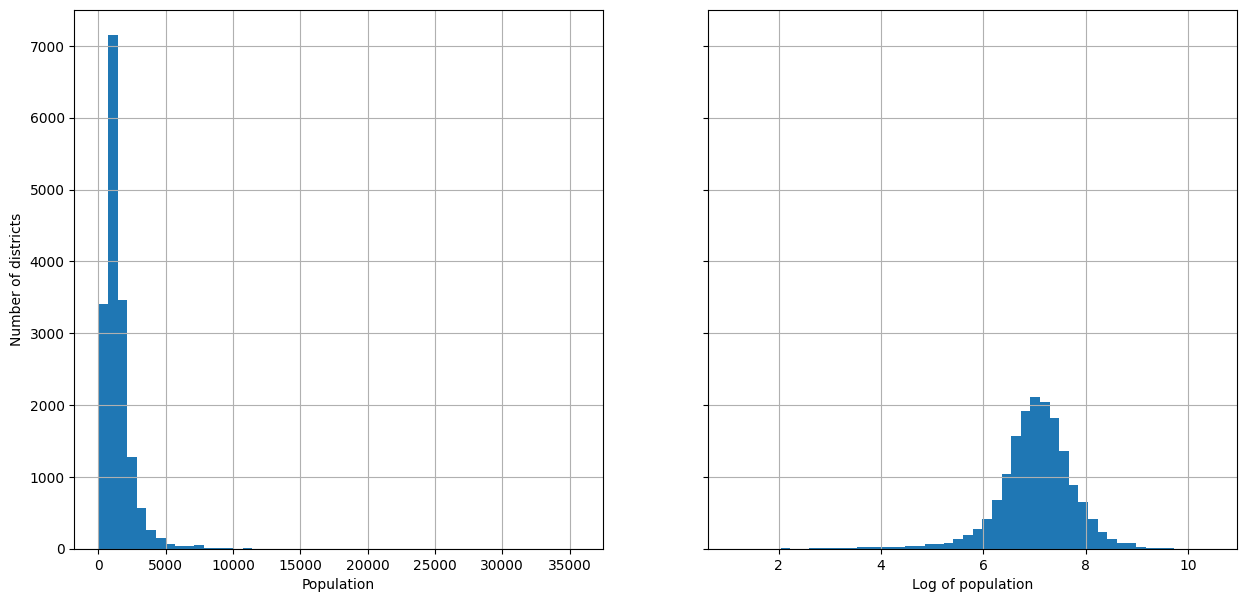

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)

axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")

plt.show()

Hasta ahora, solo hemos analizado las características de entrada, pero es posible que también sea necesario transformar la variable objetivo. Por ejemplo, si la distribución del target tiene un sesgo, podemos aplicarle el logaritmo. Sin embargo, el modelo predecirá el logaritmo del `median_income`, no el valor en sí. Deberíamos calcular la exponencial de la predicción para obtener el valor buscado.

## Resumen de la segunda parte: Preprocesamiento de los datos

En esta segunda parte:
- Hicimos una limpieza de los datos de entrenamiento:
    - Manejo de datos faltantes o erróneos. Imputamos valores (media, mediana, etc)
- Manejo de atributos categóricos
    - OrdinalEncoder
    - Codificación OneHot
- Transformación y escalado de atributos

## Preprocesamiento de Datos usando Pipelines

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [47]:
# Cargamos los datos
df_housing = pd.read_csv("./1_datos/housing.csv")

# Creamos nuestro atributo categórico para los ingresos
df_housing["income_cat"] = pd.cut(df_housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

# Dividimos los datos en conjunto de entrenamiento y prueba
train_set, test_set = train_test_split(df_housing, test_size=0.2, stratify=df_housing["income_cat"], random_state=42)

# Eliminamos la categoria income_cat de ambos conjuntos porque no la usamos
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Separamos predictores y etiquetas
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

En Scikit-Learn, podemos utilizar `FunctionTransformer` para aplicar transformaciones simples a los datos. 

In [48]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

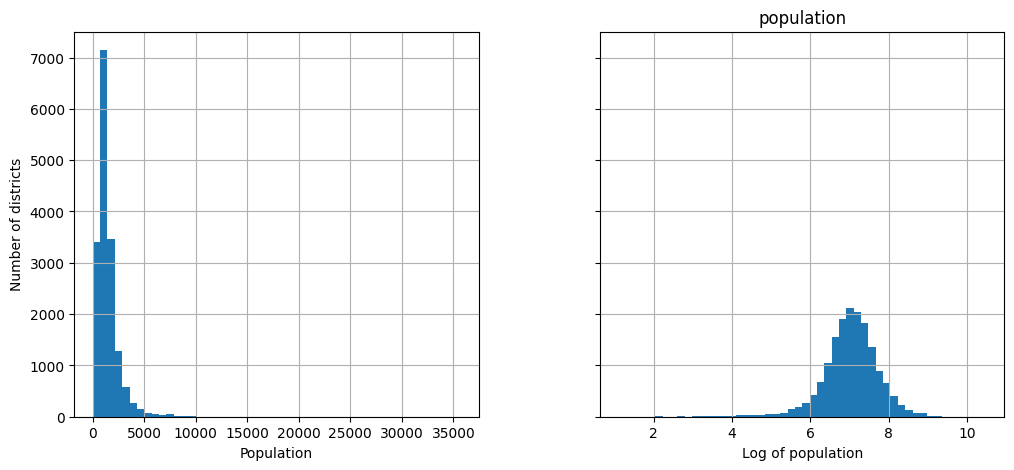

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

housing["population"].hist(ax=axs[0], bins=50)
log_pop.hist(ax=axs[1], bins=50)

axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")

plt.show()

Sin embargo, si necesitamos que el transformador aprenda parámetros durante el ajuste (`fit()`) y los utilice en `transform()`, es necesario escribir una clase personalizada.

Scikit-Learn sigue el principio de **"duck typing"**, lo que significa que no es obligatorio heredar de una clase base específica. Sin embargo, para que nuestro transformador funcione correctamente dentro de un pipeline de Scikit-Learn, debe incluir tres métodos esenciales:

- `fit(X, y=None)` $\rightarrow$ Aprende parámetros de los datos y devuelve `self`.
- `transform(X)` $\rightarrow$ Aplica la transformación a los datos y devuelve el resultado.
- `fit_transform(X, y=None)` $\rightarrow$ Aplica `fit()` y luego `transform()` (si no se hereda de `TransformerMixin`, se debe definir manualmente).

Opcionalmente, podemos heredar de las clases base `TransformerMixin` y `BaseEstimator`, lo que añade funcionalidades adicionales:

- `TransformerMixin` $\rightarrow$ Implementa `fit_transform()` automáticamente.
- `BaseEstimator` → Proporciona `get_params()` y `set_params()`, lo que facilita la optimización de hiperparámetros con `GridSearchCV`.

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
    
class LogTransformer(BaseEstimator, TransformerMixin):
    """Transformador personalizado para aplicar una transformación logarítmica."""
    
    def __init__(self, epsilon=1e-10):
        self.epsilon = epsilon  # Pequeño valor para evitar log(0)
    
    def fit(self, X, y=None): # y es requerido aunque no se usa        
        X = check_array(X)  # verifica que X es un array con valores flotantes finitos
        self.n_features_in_ = X.shape[1] if X.ndim > 1 else 1
        
        if hasattr(X, 'columns'):
            self.feature_names_in_ = np.array(X.columns)
        else:
            self.feature_names_in_ = None

        # obtiene el valor mínimo positivo (para evitar log(0))
        self.epsilon_ = np.min(X[X > 0]) if np.any(X > 0) else self.epsilon
        return self  # Devuelve self para permitir encadenamiento, siempre debe retornar self!
    
    def transform(self, X):
        """Aplica la transformación logarítmica a los datos."""
        check_is_fitted(self, "epsilon_") # se fija en los atributos entrenados (con _ al final)
        return np.log(X + self.epsilon_)
    
    def inverse_transform(self, X):
        # Invertir la transformación: calcular la exponencial y restar 1 y epsilon.
        check_is_fitted(self, "epsilon_")
        X = check_array(X)
        return np.exp(X) - self.epsilon_
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            if self.feature_names_in_ is not None:
                return self.feature_names_in_  # Mantiene los nombres originales si están disponibles
            else:
                # Genera nombres predeterminados si no hay nombres originales disponibles
                return np.array([f"x{i}" for i in range(self.n_features_in_)])
        return np.array(input_features)  # Devuelve los nombres tal cual están

In [51]:
log_tr = LogTransformer()
log_pop = log_tr.fit_transform(housing[["population"]])

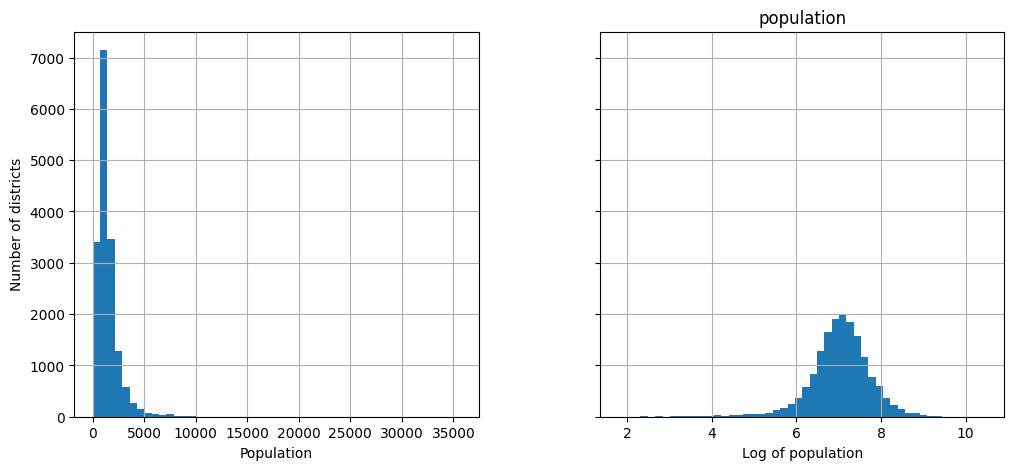

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

housing["population"].hist(ax=axs[0], bins=50)
log_pop.hist(ax=axs[1], bins=50)

axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")

plt.show()

### Pipelines en Scikit-Learn

Los pipelines en Scikit-Learn permiten encadenar múltiples pasos de preprocesamiento y modelado dentro de un flujo de trabajo estructurado. Esto facilita la organización del código, la reproducibilidad y la integración de transformaciones con modelos de aprendizaje automático.

In [53]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")), # los nombres deben ser únicos y no tener __ (dobles guiones bajos)
    ("standardize", StandardScaler()),
])
num_pipeline

,steps,"[('impute', ...), ('standardize', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


Un pipeline está compuesto por una secuencia de transformers y un estimador(modelo) final:

- Los `Transformers` Deben implementar el método `fit_transform(X, y=None)`.
    - Ejemplo: `StandardScaler()`, `OneHotEncoder()`, `SimpleImputer()`.
- El estimador final es el último paso del pipeline.
    - Puede ser un modelo predictivo (LinearRegression(), RandomForestClassifier(), etc.), que implementa `fit()` y `predict()`. También puede ser otro transformer, como `StandardScaler()`, en cuyo caso el pipeline funcionará como un transformador.

¿Cómo Funciona un Pipeline?

- Cuando se llama a `fit()` sobre un pipeline:
    - Se ejecuta `fit_transform()` en todos los transformadores de la secuencia, pasando la salida de cada uno al siguiente.
    - Al llegar al estimador final, solo se ejecuta `fit()`.

- Cuando se llama a `transform()` sobre un pipeline (si el último paso es un transformador):
    - Se aplica `transform()` secuencialmente en cada transformador del pipeline.

- Cuando se llama a `predict()` sobre un pipeline (si el último paso es un estimador):
    - Se aplican todas las transformaciones necesarias sobre los datos de entrada.
    - El resultado se pasa al método `predict()` del modelo final.

In [54]:
housing_num = housing.drop("ocean_proximity", axis=1)

housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

In [55]:
num_pipeline.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [56]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),index=housing_num.index)
df_housing_num_prepared[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-1.251077,1.048079,-0.211016,0.151734,-0.245718,-0.533051,0.343342,-0.494985
10915,0.852065,-0.893080,1.299986,-0.167671,-0.245718,0.493276,0.005292,-0.239693
19150,-1.560803,1.267921,-1.165333,-0.144756,-0.245718,-0.417421,-0.266212,-0.049654
4186,0.672224,-0.705981,1.538566,-0.614744,-0.245718,-0.524088,-0.540378,0.216926
16885,-1.410935,0.907754,-0.211016,0.307929,-0.245718,-0.246217,-0.045282,1.303035
...,...,...,...,...,...,...,...,...
1350,-1.186134,1.118241,-1.881070,1.357803,-0.245718,1.602067,1.370799,0.105422
4691,0.602285,-0.734045,1.697618,-0.048420,-0.245718,-0.271315,0.050543,0.257663
9149,0.537343,-0.551623,-0.926753,3.574930,-0.245718,3.169792,2.624509,0.855813
16757,-1.450900,0.963884,0.345669,0.874253,-0.245718,1.844083,2.768247,-0.431149


#### Mejor implementar un transformer que aplique las transformaciones necesarias a columnas numéricas y categóricas

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
    )

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

`ColumnTransformer` es una herramienta de Scikit-Learn que permite aplicar diferentes transformaciones a diferentes columnas de un conjunto de datos en un solo paso. Esto es especialmente útil cuando se tienen atributos numéricos y categóricos que requieren distintos tipos de preprocesamiento.

In [58]:
# Otra forma de implementar el preprocesamiento anterior
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

Ahora si, apliquemos nuestro transformer!!

In [59]:
housing_prepared = preprocessing.fit_transform(housing)

In [60]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

In [61]:
housing_prepared_df = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)

housing_prepared_df.head()

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0


In [62]:
housing_prepared_df.shape

(16512, 13)

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    LogTransformer(),
    StandardScaler())


preprocessing_2 = ColumnTransformer(
    [
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=num_pipeline

    )
preprocessing_2

,transformers,"[('log', ...), ('cat', ...)]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [64]:
housing_prepared_2 = preprocessing_2.fit_transform(housing)

In [65]:
preprocessing_2.get_feature_names_out()

array(['log__total_bedrooms', 'log__total_rooms', 'log__population',
       'log__households', 'log__median_income',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__longitude',
       'remainder__latitude', 'remainder__housing_median_age'],
      dtype=object)

In [66]:
housing_prepared_df_2 = pd.DataFrame(
    housing_prepared_2,
    columns=preprocessing_2.get_feature_names_out(),
    index=housing.index)

housing_prepared_df_2.head()

,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age
12655,0.875178,0.852422,0.939044,0.799439,-1.010629,0.0,1.0,0.0,0.0,0.0,-0.941350,1.347438,0.027564
15502,0.972499,1.278141,0.797149,0.915205,1.307318,0.0,0.0,0.0,0.0,1.0,1.171782,-1.192440,-1.722018
2908,-0.432478,-0.318017,-0.703494,-0.377085,-0.435512,0.0,1.0,0.0,0.0,0.0,0.267581,-0.125972,1.220460
14053,0.281006,-0.118922,-0.299930,0.277465,-0.962352,0.0,0.0,0.0,0.0,1.0,1.221738,-1.351474,-0.370069
20496,0.584190,0.730341,0.671592,0.529097,0.532980,1.0,0.0,0.0,0.0,0.0,0.437431,-0.635818,-0.131489


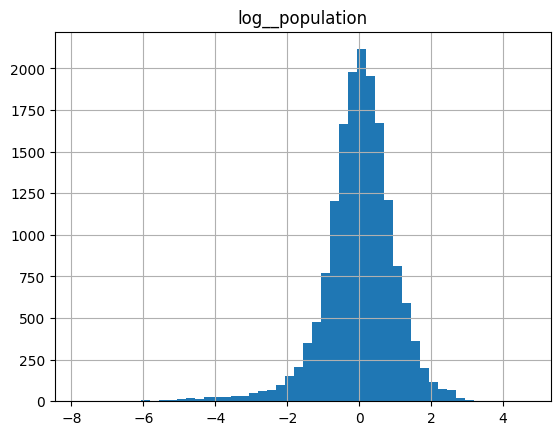

In [67]:
housing_prepared_df_2[['log__population']].hist(bins=50)

plt.show()

# Selección y entrenamiento del modelo

**¿Qué tipo de entrenamiento necesitamos para nuestro modelo? ¿Qué tarea se va a realizar?**  

Este problema se enmarca dentro del **aprendizaje supervisado**, ya que el modelo se entrena con datos etiquetados, donde cada instancia incluye la salida esperada: el **precio medio de las viviendas** en un distrito determinado.  

En cuanto al tipo de tarea, se trata de un **problema de regresión**, ya que el objetivo es predecir un valor continuo. Más específicamente, es un caso de **regresión múltiple**, dado que el modelo utilizará múltiples variables de entrada (como la población del distrito, el ingreso medio, entre otras) para realizar la predicción.  

Es un problema de **regresión univariada**, ya que el modelo predice un único valor por distrito (el precio medio de las viviendas). Si, en cambio, se intentara predecir múltiples valores por distrito (por ejemplo, el precio medio de distintos tipos de viviendas en una misma zona), estaríamos frente a un problema de **regresión multivariada**.

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [69]:
# Cargamos los datos
df_housing = pd.read_csv("./1_datos/housing.csv")

# Creamos nuestro atributo categórico para los ingresos
df_housing["income_cat"] = pd.cut(df_housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

# Dividimos los datos en conjunto de entrenamiento y prueba
train_set, test_set = train_test_split(df_housing, test_size=0.2, stratify=df_housing["income_cat"], random_state=42)

# Eliminamos la categoria income_cat de ambos conjuntos porque no la usamos
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Separamos predictores y etiquetas
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [70]:

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    LogTransformer(),
    StandardScaler())


preprocessing_2 = ColumnTransformer(
    [
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=num_pipeline

    )

## Entrenamiento del Modelo
¡Finalmente! Hemos resuelto el problema, obtuvimos los datos, los exploramos, los dividimos en un conjunto de entrenamiento y un conjunto de prueba, y creamos un _pipeline_ de preprocesamiento para limpiar y preparar automáticamente los datos para los algoritmos de aprendizaje maquinal. Ahora estamos listos para seleccionar y entrenar un modelo.

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing_2, LinearRegression())
lin_reg.fit(housing, housing_labels)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log', ...), ('cat', ...)]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [72]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round()

array([ 75630., 298892., 177660., 201467., 258433.])

In [73]:
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

## Validación del Modelo

Vamos a usar la raiz del error cuadrático medio (RMSE) como medida de desempeño

In [74]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

70531.58276250532

El valor de `median_house_value` de los distritos oscila entre \$120,000 y \$265,000, por lo que un error de predicción de \$70,532 no es muy bueno. Este es un ejemplo de un modelo mal ajustado (`underfitting`) a los datos de entrenamiento. Cuando esto ocurre, puede significar que las características no proporcionan suficiente información para realizar buenas predicciones o que el modelo no es lo suficientemente bueno.

Formas de corregir el desajuste son seleccionar un modelo más potente, proporcionar al algoritmo mejores características o reducir las restricciones en el modelo.

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing_2, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log', ...), ('cat', ...)]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

¿Ningún error en absoluto? Es probable que el modelo se haya sobreajustado (`overfitting`) a los datos. La situación más probable es que el modelo haya memorizado los datos de entrenamiento en lugar de aprender patrones generales que puedan aplicarse a nuevos datos. El sobreajuste ocurre cuando un modelo se ajusta demasiado a los detalles específicos de los datos de entrenamiento y, como resultado, tiene un rendimiento deficiente en datos nuevos y no vistos.

¿Cómo podemos comprobarlo? ¿Usamos los datos de prueba? Como dijimos anteriormente, no miramos el conjunto de prueba ni lo usamos, hasta que un modelo entrenado esté listo para usar, por lo que necesitas utilizar parte del conjunto de entrenamiento para entrenar y otra parte para validar del modelo.

**Usamos validación cruzada**

In [77]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [78]:
tree_rmses

array([70618.93509952, 68717.20112483, 64811.31663016, 69104.50405262,
       66639.90261572, 67669.9360713 , 72506.47721299, 68698.86759177,
       66948.71049264, 71411.81985203])

In [79]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     68712.767074
std       2337.656579
min      64811.316630
25%      67129.016887
50%      68708.034358
75%      70240.327338
max      72506.477213
dtype: float64

In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing_2, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count       10.000000
mean     49411.363290
std       2262.507330
min      46006.087500
25%      47772.114326
50%      49076.896563
75%      50763.397367
max      53376.435443
dtype: float64

## Ajuste de hiperparámetros del modelo

Usaremos GridSearch para ajustar los parámetros de nuestros modelos (Lo veremos en las siguientes clases)

# Evaluación de modelo con los datos de prueba

In [81]:
final_model = forest_reg

final_model.fit(housing, housing_labels)

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

47030.66059444897
